[174.0, 179.0, 165.0, 177.0, 181.0, 148.0, 165.0, 159.0, 172.0, 158.0]
[78.0, 80.0, 71.0, 68.0, 79.0, 55.0, 75.0, 60.0, 74.0, 61.0]
--- Bivariate Statistics ---
Mean Height: 167.80 cm, Mean Weight: 70.10 kg
Variance Height: 113.51, Variance Weight: 77.43
Covariance: 81.69
Correlation Coefficient: 0.87
Regression Line(Y on X): Weight = 0.72 * Height + -50.66
Regression Line(X on Y): Height = 1.05 * Weight + 93.85


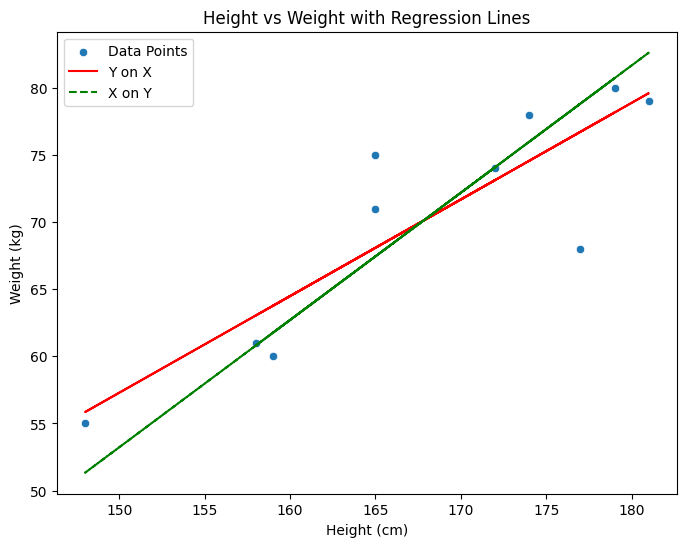

In [28]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt


heights = []
weights = []

count =0
with open("/home/student/Downloads/health_fitness_data.csv", "r") as file:    #also done using pandas
    reader = csv.DictReader(file)
    for row in reader:
        if count <10:
            heights.append(float(row["Height_cm"]))
            weights.append(float(row["Weight_kg"]))
            count+=1
        else:
            break

n = len(heights)

print(heights)
print(weights)
mean_h = sum(heights) / n
mean_w = sum(weights) / n

var_h = sum((h - mean_h) ** 2 for h in heights) / (n - 1)
var_w = sum((w - mean_w) ** 2 for w in weights) / (n - 1)

cov_hw = sum((heights[i] - mean_h) * (weights[i] - mean_w) for i in range(n)) / (n - 1)

corr_hw = cov_hw / (sqrt(var_h) * sqrt(var_w))

slope_yx= cov_hw / var_h
intercept_yx = mean_w - slope_yx * mean_h


slope_xy = cov_hw / var_w
intercept_xy = mean_h - slope_xy * mean_w

print("--- Bivariate Statistics ---")
print(f"Mean Height: {mean_h:.2f} cm, Mean Weight: {mean_w:.2f} kg")
print(f"Variance Height: {var_h:.2f}, Variance Weight: {var_w:.2f}")
print(f"Covariance: {cov_hw:.2f}")
print(f"Correlation Coefficient: {corr_hw:.2f}")
print(f"Regression Line(Y on X): Weight = {slope_yx:.2f} * Height + {intercept_yx:.2f}")
print(f"Regression Line(X on Y): Height = {slope_xy:.2f} * Weight + {intercept_xy:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=heights, y=weights, label="Data Points")

x_for_y_on_x = [slope_yx * h + intercept_yx for h in heights]
plt.plot(heights, x_for_y_on_x ,color="red", label="Y on X")

y_for_x_on_y = [(h - intercept_xy) / slope_xy for h in heights]
plt.plot(heights, y_for_x_on_y, color="green", linestyle="--", label="X on Y")


plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Height vs Weight with Regression Lines")
plt.legend()
plt.show()





--- Bivariate Statistics ---
Mean Height: 169.29 cm, Mean Weight: 69.31 kg
Variance Height: 109.07, Variance Weight: 235.39
Covariance: 5.95
Covariance matrix:
[[109.06547619047619, 5.951330532212885], [5.951330532212885, 235.39152661064426]]
Correlation Coefficient: 0.04
Regression Line (Y on X): Weight = 0.05 * Height + 60.07
Regression Line (X on Y): Height = 0.03 * Weight + 167.54


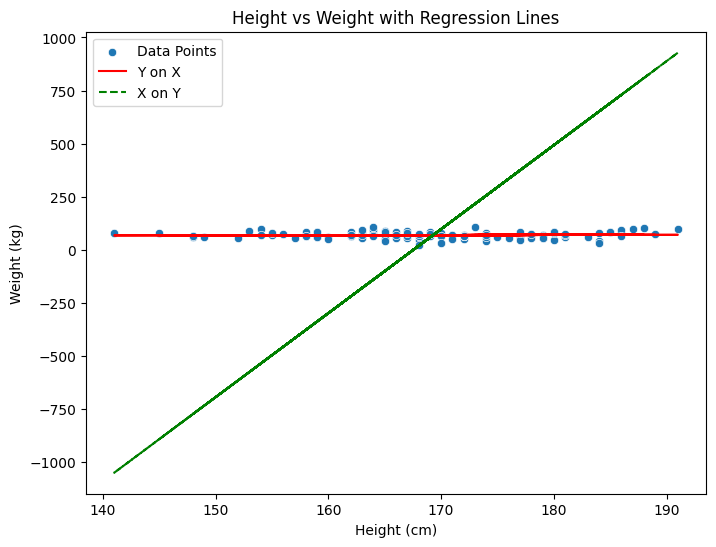

In [15]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

# ---- Functions ----
def mean(data):
    return sum(data) / len(data)

def variance(data):
    m = mean(data)
    return sum((x - m) ** 2 for x in data) / (len(data) - 1)

def covariance(x, y):
    mx = mean(x)
    my = mean(y)
    return sum((x[i] - mx) * (y[i] - my) for i in range(len(x))) / (len(x) - 1)

def correlation(x, y):
    return covariance(x, y) / (sqrt(variance(x)) * sqrt(variance(y)))

def regression_y_on_x(x, y):
    b = covariance(x, y) / variance(x)
    a = mean(y) - b * mean(x)
    return a, b  # intercept, slope

def regression_x_on_y(x, y):
    b = covariance(x, y) / variance(y)
    a = mean(x) - b * mean(y)
    return a, b  


heights = []
weights = []

with open("/home/student/Downloads/health_fitness_data.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        heights.append(float(row["Height_cm"]))
        weights.append(float(row["Weight_kg"]))


mean_h = mean(heights)
mean_w = mean(weights)
var_h = variance(heights)
var_w = variance(weights)
cov_hw = covariance(heights, weights)
corr_hw = correlation(heights, weights)

cov_matrix = [[var_h, cov_hw], [cov_hw, var_w]]

intercept_yx, slope_yx = regression_y_on_x(heights, weights)
intercept_xy, slope_xy = regression_x_on_y(heights, weights)


print("--- Bivariate Statistics ---")
print(f"Mean Height: {mean_h:.2f} cm, Mean Weight: {mean_w:.2f} kg")
print(f"Variance Height: {var_h:.2f}, Variance Weight: {var_w:.2f}")
print(f"Covariance: {cov_hw:.2f}")
print(f"Covariance matrix:\n{cov_matrix}")
print(f"Correlation Coefficient: {corr_hw:.2f}")
print(f"Regression Line (Y on X): Weight = {slope_yx:.2f} * Height + {intercept_yx:.2f}")
print(f"Regression Line (X on Y): Height = {slope_xy:.2f} * Weight + {intercept_xy:.2f}")




